<a href="https://colab.research.google.com/github/JacopoMangiavacchi/TF-PyTorch-LinearRegression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import PyTorch and TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.6.0+cu101


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = np.random.uniform(-10, 10, n)
    noise = np.random.normal(0, 0.15, n)
    y = (m * x + b ) + noise
    return x.astype(np.float32), y.astype(np.float32)

    # x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    # noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    # y = (m * x + b ) + noise
    # return x.numpy(), y.numpy()

## Data Visualization

<class 'numpy.ndarray'> (200,) float32
<class 'numpy.ndarray'> (200,) float32


Text(0, 0.5, 'y')

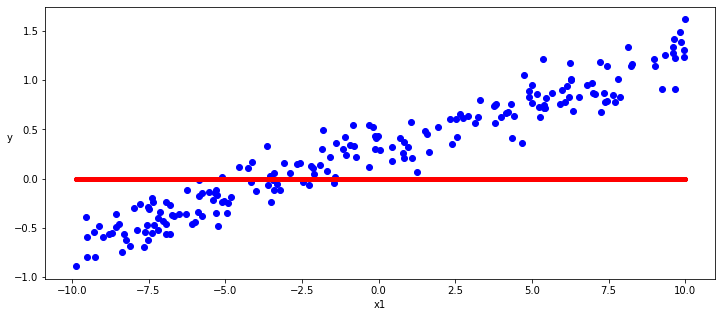

In [6]:
m = tf.Variable(0.)
b = tf.Variable(0.)
x, y = generate_data()

print(type(x), x.shape, x.dtype)
print(type(y), y.shape, y.dtype)

plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
ax.plot(x,m*x+b,"-r",linewidth = 5.0,label = "model")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

# TensorFlow Model

In [7]:
class LinearRegressionKeras:
    def __init__(self):
        self.params = {
            "w" : tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1)),
            "b" : tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))
        }        

    def __call__(self,x): 
        y_pred = self.params["w"] * x + self.params["b"]
        return y_pred

# PyTorch Model

In [8]:
class LinearRegressionPyTorch(torch.nn.Module): 
    def __init__(self): 
        super(LinearRegressionPyTorch, self).__init__() 
        self.w = torch.nn.Parameter(torch.Tensor(1, 1))
        self.b = torch.nn.Parameter(torch.Tensor(1))
        self.w.data.uniform_(-0.1, 0.1)
        self.b.data.uniform_(-0.1, 0.1)
  
    def forward(self, x):  
        return x @ self.w + self.b
    
    
# class LinearRegressionPyTorch(torch.nn.Module):
#     def __init__(self):
#         super(LinearRegressionPyTorch, self).__init__()
#         self.linear = torch.nn.Linear(1, 1)  

#     def forward(self, x):
#         out = self.linear(x)
#         return out

# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

In [10]:
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

tf_model = LinearRegressionKeras()

for epoch in tf.range(1,epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
        
    dloss_dw,dloss_db = tape.gradient(loss, [tf_model.params["w"], tf_model.params["b"]])

    tf_model.params["w"].assign(tf_model.params["w"] - learning_rate*dloss_dw)
    tf_model.params["b"].assign(tf_model.params["b"] - learning_rate*dloss_db)
    if epoch % 20 == 0:
        print(f"Step {epoch}, Loss {loss.numpy()}") # we print the loss only each 20 epochs

Step 20, Loss 0.23189900815486908
Step 40, Loss 0.161915123462677
Step 60, Loss 0.14820945262908936
Step 80, Loss 0.13844545185565948
Step 100, Loss 0.12959475815296173
Step 120, Loss 0.12143250554800034
Step 140, Loss 0.11389711499214172
Step 160, Loss 0.10693996399641037
Step 180, Loss 0.1005166545510292
Step 200, Loss 0.09458623826503754
Step 220, Loss 0.08911088854074478
Step 240, Loss 0.08405569195747375
Step 260, Loss 0.07938835769891739
Step 280, Loss 0.07507920265197754
Step 300, Loss 0.07110068947076797
Step 320, Loss 0.06742745637893677
Step 340, Loss 0.06403608620166779
Step 360, Loss 0.06090494617819786
Step 380, Loss 0.05801406875252724
Step 400, Loss 0.055345021188259125
Step 420, Loss 0.05288079380989075
Step 440, Loss 0.050605643540620804
Step 460, Loss 0.04850507900118828
Step 480, Loss 0.04656568542122841


# PyTorch Training

In [11]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))


In [12]:
def squared_error(y_pred, y_true):
    diff = y_pred - y_true
    return torch.sum(diff * diff) / diff.numel()


torch_model = LinearRegressionPyTorch()
[w, b] = torch_model.parameters()

# criterion = torch.nn.MSELoss(reduction='mean')
# optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    epoch_loss = 0
    y_pred = torch_model(inputs)

    loss = squared_error(y_pred, labels)

    epoch_loss = loss.data

    # optimizer.zero_grad()
    loss.backward()
    # optimizer.step()

    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 20 == 0:
      print("Epoch {} : Loss {}".format(epoch, epoch_loss))


Epoch 0 : Loss 0.6378704905509949
Epoch 20 : Loss 0.13227488100528717
Epoch 40 : Loss 0.09788285195827484
Epoch 60 : Loss 0.09067712724208832
Epoch 80 : Loss 0.08541787415742874
Epoch 100 : Loss 0.08064127713441849
Epoch 120 : Loss 0.07623568177223206
Epoch 140 : Loss 0.07216840982437134
Epoch 160 : Loss 0.06841325759887695
Epoch 180 : Loss 0.0649462342262268
Epoch 200 : Loss 0.06174526363611221
Epoch 220 : Loss 0.05878991633653641
Epoch 240 : Loss 0.05606132373213768
Epoch 260 : Loss 0.0535421222448349
Epoch 280 : Loss 0.05121622979640961
Epoch 300 : Loss 0.04906880855560303
Epoch 320 : Loss 0.047086164355278015
Epoch 340 : Loss 0.04525566101074219
Epoch 360 : Loss 0.04356561601161957
Epoch 380 : Loss 0.04200524464249611
Epoch 400 : Loss 0.040564607828855515
Epoch 420 : Loss 0.039234522730112076
Epoch 440 : Loss 0.038006484508514404
Epoch 460 : Loss 0.03687269613146782
Epoch 480 : Loss 0.03582588955760002


# Data Visualization

In [13]:
tf_model.params["w"].numpy(), tf_model.params["b"].numpy(), w.tolist()[0][0], b.tolist()[0]

(array([0.09480859], dtype=float32),
 array([0.1541436], dtype=float32),
 0.09517883509397507,
 0.19314464926719666)

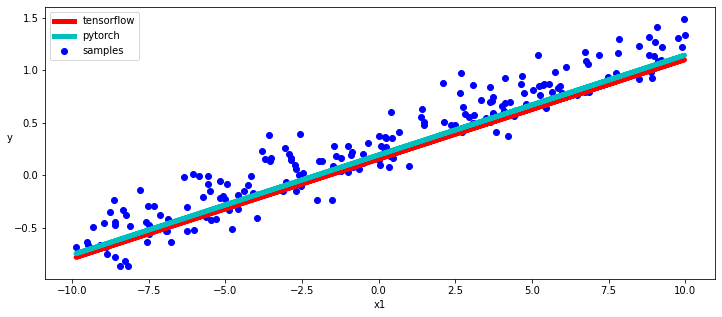

In [14]:
with torch.no_grad():
  x_train, y_train = generate_data()
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x_train,y_train, c = "b", label="samples")
  ax.plot(x, tf_model.params["w"] * x + tf_model.params["b"], "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w * inputs + b, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)